In [57]:
from math import pi
import matplotlib.pyplot as plt
# from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now
import numpy as np

In [58]:
num_qubits=6
dev=qml.device('default.qubit', wires=num_qubits)

# define my own embedding layer
def myembedding(x,wires):
    qml.RY(np.arcsin(x), wires=wires[0])
    qml.RY(2*pi*x, wires=wires[1])


def Ham():
    obs=[]
    for j in range(num_qubits):
        obs.append(qml.PauliX(j))
        for k in range(j):
            obs.append(qml.PauliZ(j)@qml.PauliZ(k))
    coeffs=np.random.uniform(-1,1,len(obs))*10
    qml.Hamiltonian(coeffs, obs)

# define ansastz layer
def layer(theta):
    
    # Apply Hamiltonian matrix
    Ham()
    
    # Apply H gate
    qml.Hadamard(0)
    
    # rotations on qubits
    qml.RY(theta[0],wires=0)
    qml.RY(theta[1],wires=1)
    
    # CNOT
    qml.CNOT(wires=[0, 1])

@qml.qnode(dev)
def quantum_net(theta,x):
    
    # encode data
    myembedding(x,wires=range(num_qubits))
    
    # parameterized circuit layers
    for v in theta: # (for lool along with the first dimension)
        # Ham()
        layer(v)
    
    qml.Hadamard(0)
    
    return qml.expval(qml.PauliZ(0))

In [59]:

# print(theta.shape)
# # print(theta)
# print(qml.draw(quantum_net)(theta,0))



def classical_quantum_net(theta,w,x):
    r=quantum_net(theta,x)
    return w[0]+w[1]*r+w[2]*r**2



In [60]:
#Initial Values
# del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
del1_val0, w1_val0, del2_val0, w2_val0, del3_val0, w3_val0, P_e1_val, P_e2, P_e3 = [0.0626, 1, 1.0567, 1, 0.9449, 1, 1.43824549482149, 1.040964945989, 0.757527164510807]


In [61]:
# Differential equation parameters

# Ws, H1, H2, H3, D1, D2, D3
Ws, H1, H2, H3, D1, D2, D3 = (376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01)

# P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3
P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3 = (0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813)

# e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3
e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3 = (1.0566, 1.0502, 1.0170, 0, 0, 0)

# a11-a26 of Y
a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26 = (0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096)

# a31-a46 of Y
a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42, a_43, a_44, a_45, a_46 = (0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133)

# a51-a56 of Y
a_51, a_52, a_53, a_54, a_55, a_56 = (0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681)

# a61-a66 of Y
a_61, a_62, a_63, a_64, a_65, a_66 = (1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770)

In [62]:
cos = np.cos
sin = np.sin

In [63]:
def f1(del1,del2,del3):
   return (-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))

def f2(del1,del2,del3):
   return (-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))

def f3(del1,del2,del3):
    return (-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))

In [64]:
def DE1(delta1,delta2,delta3,delta1_prime,delta1_double_prime):
    right_hand = (Ws/2*H1)*(P_m1-f1(delta1,delta2,delta3)-D1*delta1_prime)
    return delta1_double_prime - right_hand

def DE2(delta1,delta2,delta3,delta2_prime,delta2_double_prime):
    right_hand = (Ws/2*H2)*(P_m2-f2(delta1,delta2,delta3)-D2*delta2_prime)
    return delta2_double_prime - right_hand

def DE3(delta1,delta2,delta3,delta3_prime,delta3_double_prime):
    right_hand = (Ws/2*H3)*(P_m3-f3(delta1,delta2,delta3)-D3*delta3_prime)
    return delta3_double_prime - right_hand

In [65]:
def f(theta,w, t):
    r=quantum_net(theta,t)
    return w[0]+w[1]*r+w[2]*r**2



In [66]:
n_grid = 10
range_min = 0
range_max = 0.2
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]

In [67]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    global w
    global theta
 
    # Reshape the flattened theta back to its original shape
    w = np.reshape(params[:w.size], w.shape)
    theta = np.reshape(params[w.size:], theta.shape)
    w1 = w[0]
    w2= w[1]
    w3 = w[2]
    theta1 = theta[0]
    theta2 = theta[1]
    theta3 = theta[2]


    u1 = np.zeros(n_grid + 2)
    u2 = np.zeros(n_grid + 2)
    u3 = np.zeros(n_grid + 2)
    
    u1[0] = f(theta1,w1, range_min - dt)
    u1[1] = del1_val0

    u2[0] = f(theta2,w2, range_min - dt)
    u2[1] = del2_val0

    u3[0] = f(theta3,w3, range_min - dt)
    u3[1] = del3_val0

    for i in range(1, n_grid):
        u1[i + 1] = f(theta1,w1, t_data[i])
        u2[i + 1] = f(theta2,w2, t_data[i])
        u3[i + 1] = f(theta3,w3, t_data[i])


    u1[n_grid + 1]=f(theta1,w1, range_max + dt)  
    u2[n_grid + 1]=f(theta2,w2, range_max + dt)  
    u3[n_grid + 1]=f(theta3,w3, range_max + dt)  
    
    u1_prime = (u1[2:] - u1[:-2])/(2*dt)
    omega1_0 = (1/Ws)*u1_prime[0]+1
    u1_double_prime = (u1_prime[2:] - u1_prime[:-2])/(2*dt)

    u2_prime = (u2[2:] - u2[:-2])/(2*dt)
    omega2_0 = (1/Ws)*u2_prime[0]+1
    u2_double_prime = (u2_prime[2:] - u2_prime[:-2])/(2*dt)

    u3_prime = (u3[2:] - u3[:-2])/(2*dt)
    omega3_0 = (1/Ws)*u3_prime[0]+1
    u3_double_prime = (u3_prime[2:] - u3_prime[:-2])/(2*dt)


    # u_prime = f_prime(a, b, c, d,t_data)
    # u_double_prime = f_double_prime(a, b, c, d,t_data)

    loss_i_DE1 = np.sum((DE1(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta1_prime=u1_prime[1:-1],delta1_double_prime=u1_double_prime)**2))
    loss_i_DE2 = np.sum((DE2(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta2_prime=u2_prime[1:-1],delta2_double_prime=u2_double_prime)**2))
    loss_i_DE3 = np.sum((DE3(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta3_prime=u3_prime[1:-1],delta3_double_prime=u3_double_prime)**2))



    loss_i = loss_i_DE1 + loss_i_DE2 + loss_i_DE3
    # loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    # loss_i = np.sum(np.abs(DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data)))

    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)

    loss_b = 0
    loss_b += eta * (omega1_0 - w1_val0) ** 2 * len(t_data)
    loss_b += eta * (omega2_0 - w2_val0) ** 2 * len(t_data)
    loss_b += eta * (omega3_0 - w3_val0) ** 2 * len(t_data)
    # loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = (loss_i+loss_b) / len(t_data)
    # loss = loss_i
    # print("Current loss:", loss) 

    return loss


In [68]:
import numpy as np
from scipy.optimize import minimize

# Initialize w and theta with random values
np.random.seed(20)  # Set a seed for reproducibility
w = np.random.rand(3, 3)*0
theta = np.random.rand(3, 4, 2)

# Create initial_params as a list
initial_params = [w, theta]

# Flatten initial_params into a 1D array
initial_params_flat = np.concatenate([initial_params[0].flatten(), initial_params[1].flatten()])

# # Call minimize with the wrapper function
# result = minimize(loss, initial_params_flat, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

# # Extract the optimized values of w and theta from the result
# optimized_params_flat = result.x
# w = np.reshape(optimized_params_flat[:w.size], w.shape)
# theta = np.reshape(optimized_params_flat[w.size:], theta.shape)





In [69]:
del1_target_values=[0.0626, 0.06394953720748847, 0.06569858715713423, 0.06744244389809965, 0.06917493985888266, 0.07089600117637695, 0.0726056471914906, 0.07430390045064243, 0.0759907845405738, 0.07766632444992065]
omega1_target_values=[1.0, 1.0002069924246, 1.0002088049028726, 1.0002074843265396, 1.0002061187357987, 1.000204754843149, 1.0002033935810348, 1.0002020350042453, 1.00020067936557, 1.0001993268474256]

del2_target_values=[1.0567, 1.0546544667275142, 1.0519901861963084, 1.0493173304191084, 1.0466454552333528, 1.0439749894178083, 1.0413062204618804, 1.038639428349044, 1.0359748887572569, 1.0333128725781264]
omega2_target_values=[1.0, 0.9996856425639036, 0.9996809513541733, 0.9996809963420219, 0.9996811466084681, 0.999681332251746, 0.9996815515716131, 0.9996818041713461, 0.9996820893345619, 0.9996824064336052]

del3_target_values=[0.9449, 0.9409949885389632, 0.9359509313652853, 0.9309431320916126, 0.9259892325618977, 0.9210890966388376, 0.9162423146667987, 0.9114484672809254, 0.9067071331041561, 0.9020178871027813]
omega3_target_values=[1.0, 0.9994018360090102, 0.999399096933448, 0.9994054478250824, 0.9994118884331064, 0.9994182819033591, 0.9994246255160472, 0.9994309193276854, 0.9994371623779974, 0.9994433541266963]

In [70]:
print(30)

30


In [71]:
w1 = w[0]
w2= w[1]
w3 = w[2]
theta1 = theta[0]
theta2 = theta[1]
theta3 = theta[2]

print(w1)
print(w2)
print(w3)
print(theta1)
print(theta2)
print(theta3)

[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[[0.19385022 0.2723164 ]
 [0.71860593 0.78300361]
 [0.85032764 0.77524489]
 [0.03666431 0.11669374]]
[[0.7512807  0.23921822]
 [0.25480601 0.85762553]
 [0.94977903 0.56168686]
 [0.17878052 0.77025193]]
[[0.49238104 0.63125307]
 [0.83949792 0.4610394 ]
 [0.49794007 0.67941112]
 [0.65078591 0.26879524]]


In [72]:
# load the learnt parameters
w1 = [ 0.08663341 , 0.01742017, -0.4071811 ]
w2= [2.83618249, 5.26700944, 3.58716656]
w3 = [ 1.19640753, -0.2359902  ,-0.37688205]
theta1 = [[-0.5628355  , 0.2732965 ],
 [ 1.05530544 , 0.25430422],
 [ 1.01026482 ,-0.07928092],
 [-1.07220543 ,-0.58442188]]
theta2 = [[ 0.16746242 , 1.02622121],
 [-0.54735169 , 0.83788437],
 [ 1.22401269 ,-0.06925751],
 [ 0.64294517 , 0.55697821]]
theta3 = [[-0.1839643 , -1.3417497 ],
 [ 1.53566778 , 0.26305052],
 [ 1.82444173 ,-0.46102317],
 [ 0.38068501 ,-0.05084027]]

Text(0.5, 1.0, 'Fitting Data')

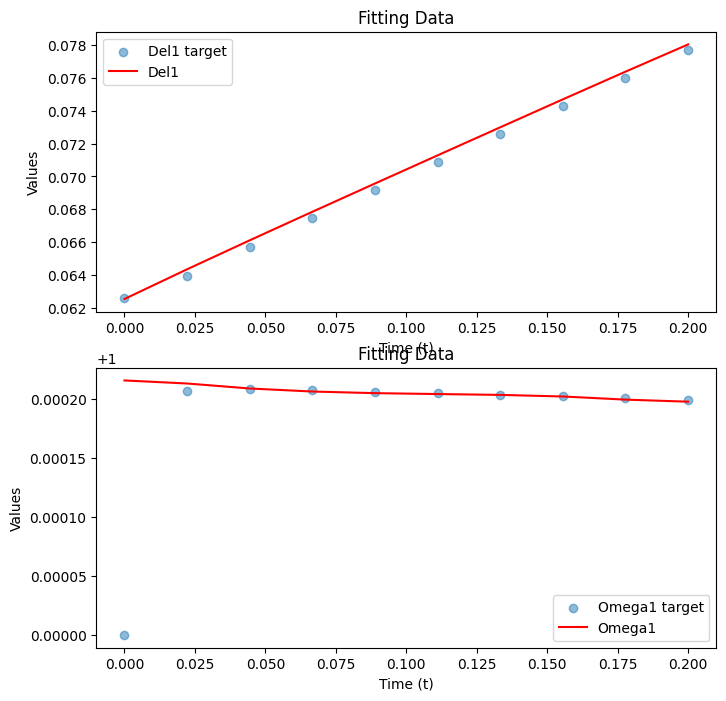

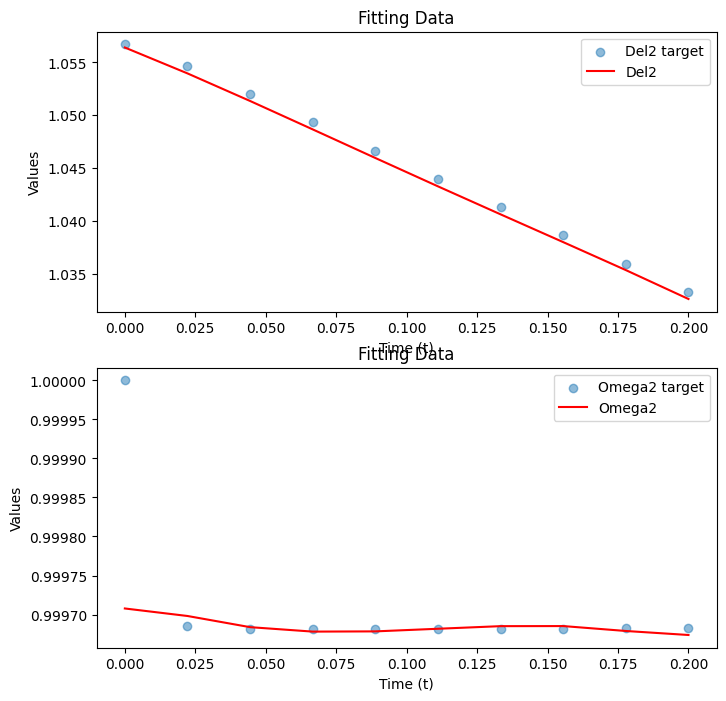

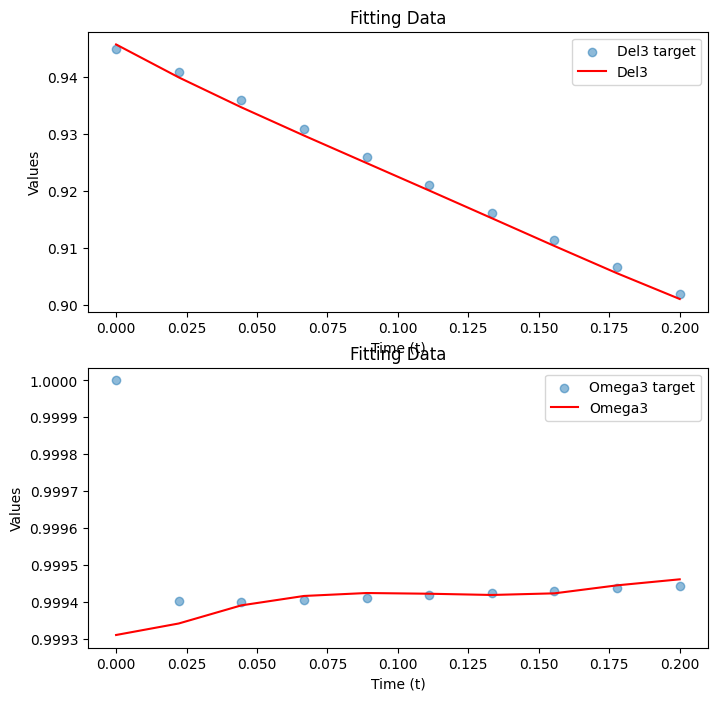

In [73]:
import matplotlib.pyplot as plt



# delta1_omega1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del1_target_values, label='Del1 target', alpha=0.5)
delta_pred1 = f(theta1,w1,t_data)
plt.plot(t_data, delta_pred1, 'r', label='Del1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



plt.subplot(2, 1, 2)
plt.scatter(t_data, omega1_target_values, label='Omega1 target', alpha=0.5)
delta_pred1_prime = np.gradient(delta_pred1, t_data)
omega_pred1 = (1/Ws)*delta_pred1_prime+1
plt.plot(t_data, omega_pred1, 'r', label='Omega1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')




# delta2_omega2
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del2_target_values, label='Del2 target', alpha=0.5)
delta_pred2 = f(theta2,w2,t_data)
plt.plot(t_data, delta_pred2, 'r', label='Del2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega2_target_values, label='Omega2 target', alpha=0.5)
delta_pred2_prime = np.gradient(delta_pred2, t_data)
omega_pred2 = (1/Ws)*delta_pred2_prime+1
plt.plot(t_data, omega_pred2, 'r', label='Omega2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta3_omega3
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del3_target_values, label='Del3 target', alpha=0.5)
delta_pred3 = f(theta3,w3,t_data)
plt.plot(t_data, delta_pred3, 'r', label='Del3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
delta_pred3_prime = np.gradient(delta_pred3, t_data)
omega_pred3 = (1/Ws)*delta_pred3_prime+1
plt.plot(t_data, omega_pred3, 'r', label='Omega3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

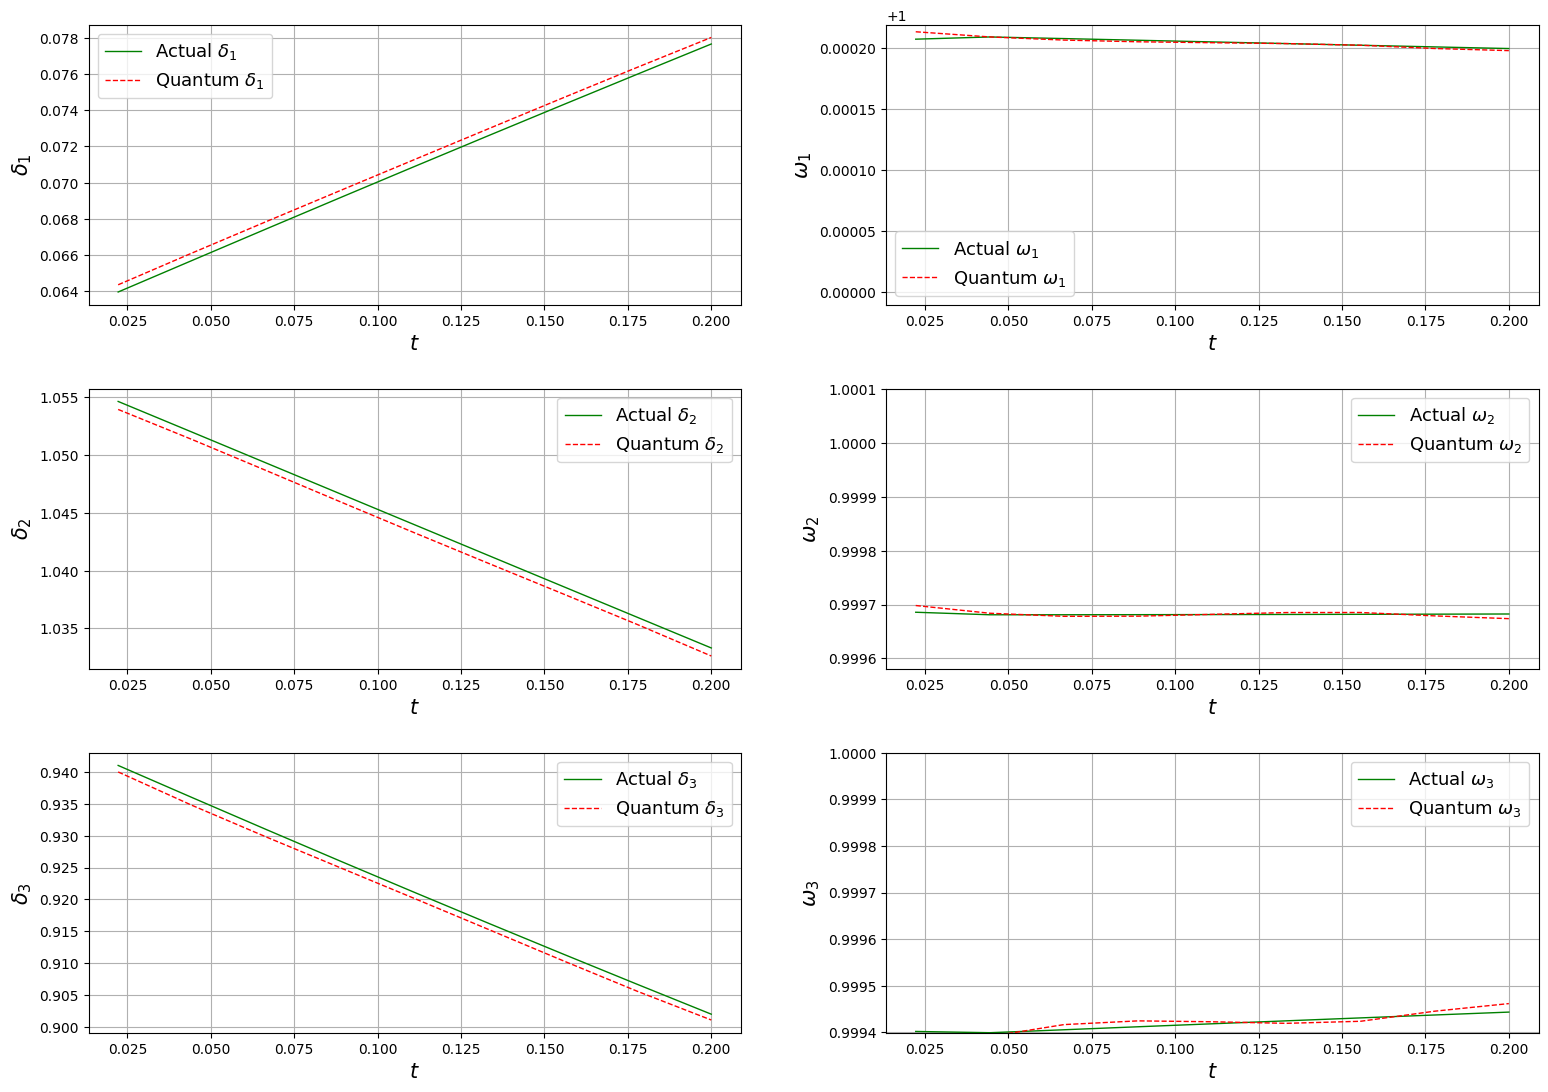

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined your data and functions

# Create a 3x2 grid of subplots with padding and border
fig, axs = plt.subplots(3, 2, figsize=(20, 14), gridspec_kw={'hspace': 0.04, 'wspace': 0.06})

# Adjust layout for better spacing
# plt.tight_layout()

# Add padding and border to each subplot
for ax in axs.flatten():
    ax.set_position([ax.get_position().x0, ax.get_position().y0, ax.get_position().width, ax.get_position().height])
    ax.set_position([ax.get_position().x0 + 0.05, ax.get_position().y0 + 0.05, ax.get_position().width - 0.05, ax.get_position().height - 0.05])

# Plot for delta1_omega1
axs[0, 0].plot(t_data[1:], del1_target_values[1:], 'g',label='Actual $\delta_1$',alpha=1, linewidth=1)
axs[0, 0].plot(t_data[1:], delta_pred1[1:], 'r--',label='Quantum $\delta_1$',alpha=1, linewidth=1)
axs[0, 0].set_xlabel('$t$', fontsize=15)
axs[0, 0].set_ylabel('$\delta_1$', fontsize=15)
axs[0, 0].legend(fontsize=13)
axs[0, 0].grid(True)

axs[0, 1].plot(t_data[1:], omega1_target_values[1:], 'g',label='Actual $\omega_1$',alpha=1, linewidth=1)
axs[0, 1].plot(t_data[1:], omega_pred1[1:],'r--',label='Quantum $\omega_1$',alpha=1, linewidth=1)
axs[0, 1].set_xlabel('$t$', fontsize=15)
axs[0, 1].set_ylabel('$\omega_1$', fontsize=15)
axs[0, 1].legend(fontsize=13)
axs[0, 1].grid(True)
axs[0, 1].set_ylim([min(omega1_target_values)-0.00001, max(omega1_target_values)+0.00001])

# Plot for delta2_omega2
axs[1, 0].plot(t_data[1:], del2_target_values[1:], 'g',label='Actual $\delta_2$',alpha=1, linewidth=1)
axs[1, 0].plot(t_data[1:], delta_pred2[1:], 'r--',label='Quantum $\delta_2$',alpha=1, linewidth=1)
axs[1, 0].set_xlabel('$t$', fontsize=15)
axs[1, 0].set_ylabel('$\delta_2$', fontsize=15)
axs[1, 0].legend(fontsize=13)
axs[1, 0].grid(True)

axs[1, 1].plot(t_data[1:], omega2_target_values[1:], 'g',label='Actual $\omega_2$',alpha=1, linewidth=1)
axs[1, 1].plot(t_data[1:], omega_pred2[1:],'r--',label='Quantum $\omega_2$',alpha=1, linewidth=1)
axs[1, 1].set_xlabel('$t$', fontsize=15)
axs[1, 1].set_ylabel('$\omega_2$', fontsize=15)
axs[1, 1].legend(fontsize=13)
axs[1, 1].grid(True)
axs[1, 1].set_ylim([min(omega2_target_values)-0.0001, max(omega2_target_values)+0.0001])

# Plot for delta3_omega3
axs[2, 0].plot(t_data[1:], del3_target_values[1:], 'g',label='Actual $\delta_3$', alpha=1, linewidth=1)
axs[2, 0].plot(t_data[1:], delta_pred3[1:],'r--',label='Quantum $\delta_3$',alpha=1, linewidth=1)
axs[2, 0].set_xlabel('$t$', fontsize=15)
axs[2, 0].set_ylabel('$\delta_3$', fontsize=15)
axs[2, 0].legend(fontsize=13)
axs[2, 0].grid(True)

axs[2, 1].plot(t_data[1:], omega3_target_values[1:], 'g',label='Actual $\omega_3$', alpha=1, linewidth=1)
axs[2, 1].plot(t_data[1:], omega_pred3[1:],'r--',label='Quantum $\omega_3$',alpha=1, linewidth=1)
axs[2, 1].set_xlabel('$t$', fontsize=15)
axs[2, 1].set_ylabel('$\omega_3$', fontsize=15)
axs[2, 1].legend(fontsize=13)
axs[2, 1].grid(True)
axs[2, 1].set_ylim([min(omega3_target_values), max(omega3_target_values)])

# Show the plot
plt.show()

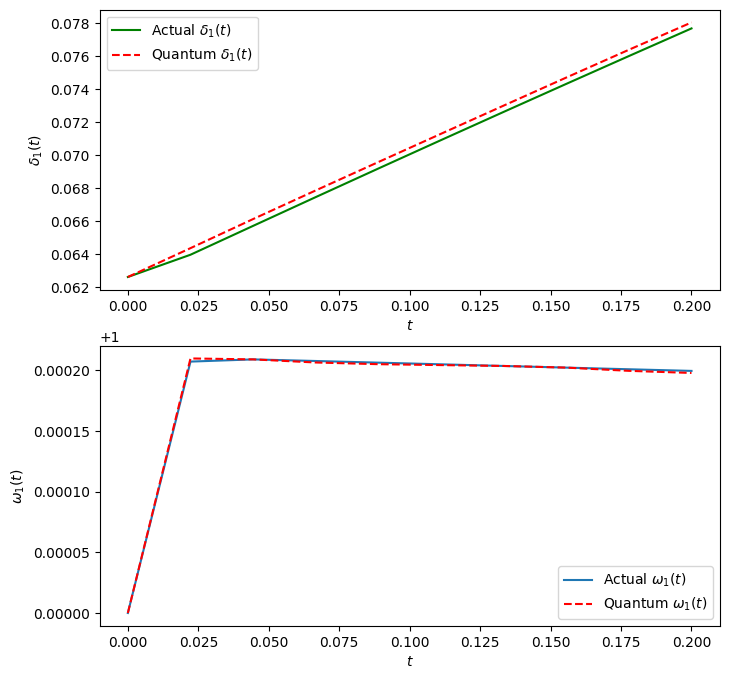

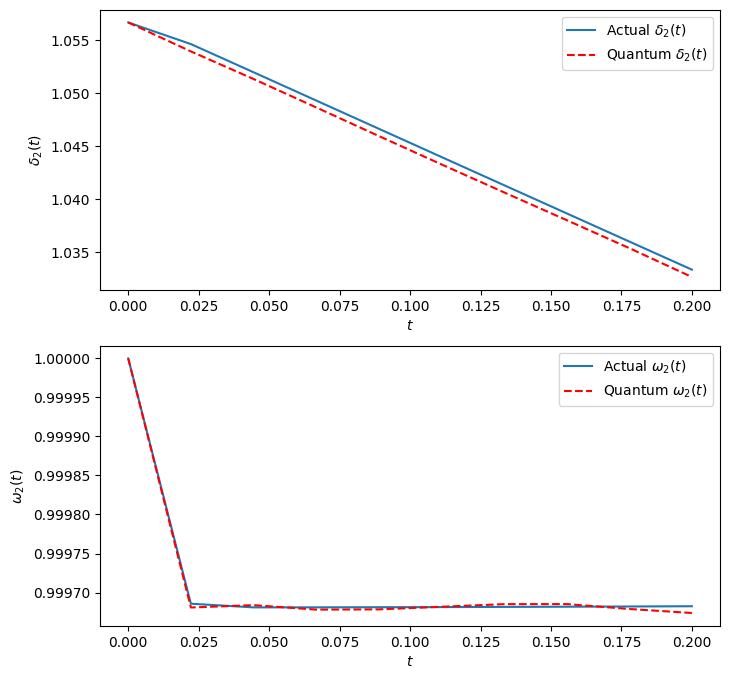

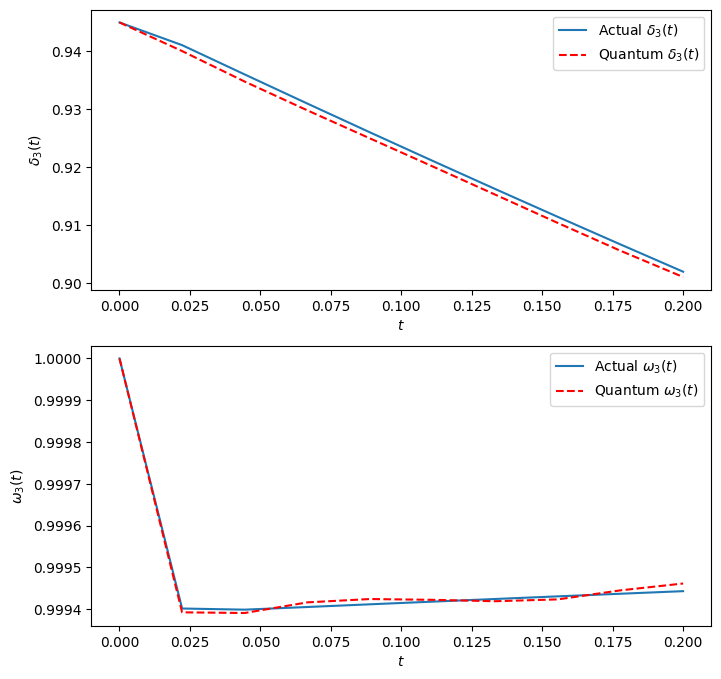

In [75]:
import matplotlib.pyplot as plt



# delta1_omega1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(t_data, del1_target_values,color='green', label='Actual $\delta_1(t)$', alpha=1)
delta_pred1 = f(theta1,w1,t_data)
delta_pred1[0]=del1_target_values[0]
plt.plot(t_data, delta_pred1, 'r--', label='Quantum $\delta_1(t)$')
plt.xlabel('$t$')
plt.ylabel('$\delta_1(t)$')
plt.legend()
#plt.title('Fitting Data')



plt.subplot(2, 1, 2)
plt.plot(t_data, omega1_target_values, label='Actual $\omega_1(t)$', alpha=1)
delta_pred1_prime = np.gradient(delta_pred1, t_data)
omega_pred1 = (1/Ws)*delta_pred1_prime+1
omega_pred1[0]=omega1_target_values[0]
plt.plot(t_data, omega_pred1, 'r--', label='Quantum $\omega_1(t)$')
plt.xlabel('$t$')
plt.ylabel('$\omega_1(t)$')
plt.legend()
#plt.title('Fitting Data')




# delta2_omega2
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(t_data, del2_target_values, label='Actual $\delta_2(t)$', alpha=1)
delta_pred2 = f(theta2,w2,t_data)
delta_pred2[0]=del2_target_values[0]
plt.plot(t_data, delta_pred2, 'r--', label='Quantum $\delta_2(t)$')
plt.xlabel('$t$')
plt.ylabel('$\delta_2(t)$')
plt.legend()
#plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.plot(t_data, omega2_target_values, label='Actual $\omega_2(t)$', alpha=1)
delta_pred2_prime = np.gradient(delta_pred2, t_data)
omega_pred2 = (1/Ws)*delta_pred2_prime+1
omega_pred2[0]=omega2_target_values[0]
plt.plot(t_data, omega_pred2, 'r--', label='Quantum $\omega_2(t)$')
plt.xlabel('$t$')
plt.ylabel('$\omega_2(t)$')
plt.legend()
#plt.title('Fitting Data')



# delta3_omega3
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(t_data, del3_target_values, label='Actual $\delta_3(t)$', alpha=1)
delta_pred3 = f(theta3,w3,t_data)
delta_pred3[0]=del3_target_values[0]
plt.plot(t_data, delta_pred3, 'r--', label='Quantum $\delta_3(t)$')
plt.xlabel('$t$')
plt.ylabel('$\delta_3(t)$')
plt.legend()
#plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.plot(t_data, omega3_target_values, label='Actual $\omega_3(t)$', alpha=1)
delta_pred3_prime = np.gradient(delta_pred3, t_data)
omega_pred3 = (1/Ws)*delta_pred3_prime+1
omega_pred3[0]=omega3_target_values[0]
plt.plot(t_data, omega_pred3, 'r--', label='Quantum $\omega_3(t)$')
plt.xlabel('$t$')
plt.ylabel('$\omega_3(t)$')
plt.legend()
# plt.title('Fitting Data')

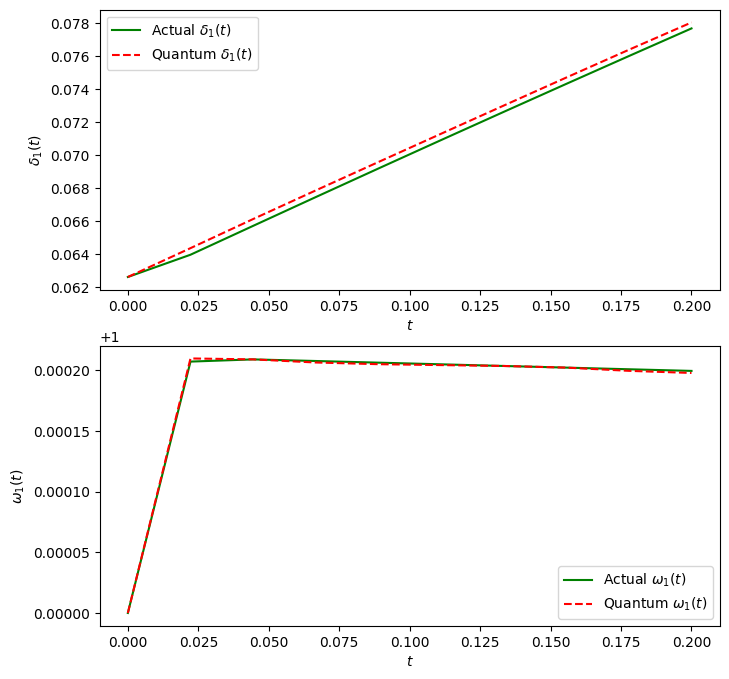

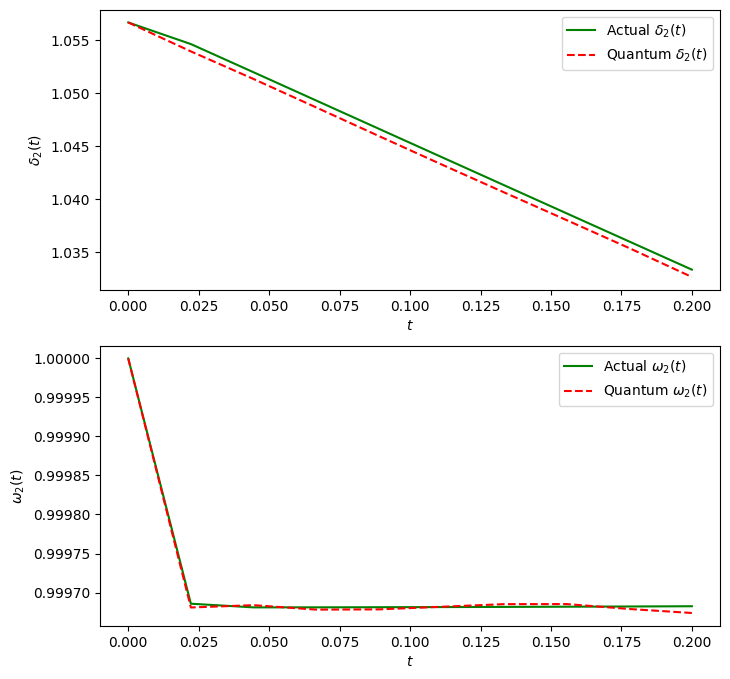

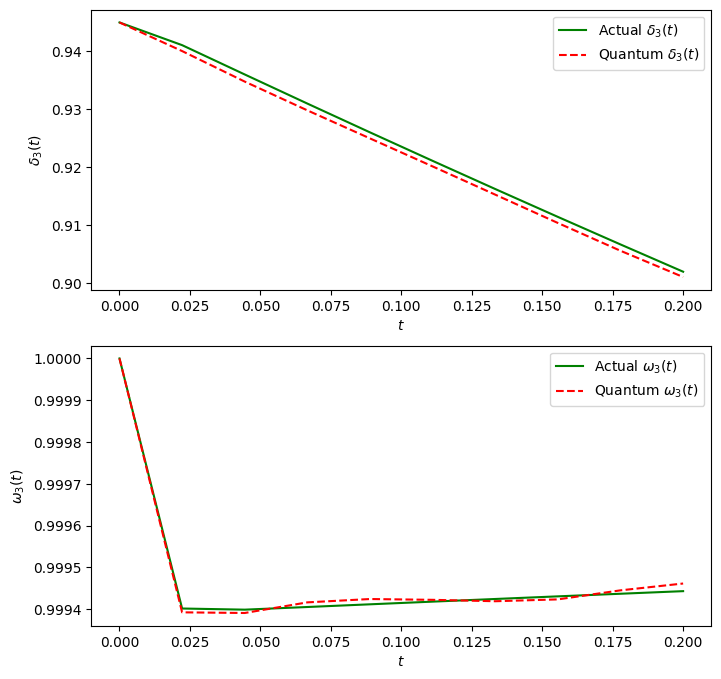

In [76]:
import matplotlib.pyplot as plt



# delta1_omega1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(t_data, del1_target_values,color='green', label='Actual $\delta_1(t)$', alpha=1)
delta_pred1 = f(theta1,w1,t_data)
delta_pred1[0]=del1_target_values[0]
plt.plot(t_data, delta_pred1, 'r--', label='Quantum $\delta_1(t)$')
plt.xlabel('$t$')
plt.ylabel('$\delta_1(t)$')
plt.legend()
#plt.title('Fitting Data')



plt.subplot(2, 1, 2)
plt.plot(t_data, omega1_target_values,color='green', label='Actual $\omega_1(t)$', alpha=1)
delta_pred1_prime = np.gradient(delta_pred1, t_data)
omega_pred1 = (1/Ws)*delta_pred1_prime+1
omega_pred1[0]=omega1_target_values[0]
plt.plot(t_data, omega_pred1, 'r--', label='Quantum $\omega_1(t)$')
plt.xlabel('$t$')
plt.ylabel('$\omega_1(t)$')
plt.legend()
#plt.title('Fitting Data')




# delta2_omega2
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(t_data, del2_target_values,color='green', label='Actual $\delta_2(t)$', alpha=1)
delta_pred2 = f(theta2,w2,t_data)
delta_pred2[0]=del2_target_values[0]
plt.plot(t_data, delta_pred2, 'r--', label='Quantum $\delta_2(t)$')
plt.xlabel('$t$')
plt.ylabel('$\delta_2(t)$')
plt.legend()
#plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.plot(t_data, omega2_target_values,color='green', label='Actual $\omega_2(t)$', alpha=1)
delta_pred2_prime = np.gradient(delta_pred2, t_data)
omega_pred2 = (1/Ws)*delta_pred2_prime+1
omega_pred2[0]=omega2_target_values[0]
plt.plot(t_data, omega_pred2, 'r--', label='Quantum $\omega_2(t)$')
plt.xlabel('$t$')
plt.ylabel('$\omega_2(t)$')
plt.legend()
#plt.title('Fitting Data')



# delta3_omega3
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(t_data, del3_target_values,color='green', label='Actual $\delta_3(t)$', alpha=1)
delta_pred3 = f(theta3,w3,t_data)
delta_pred3[0]=del3_target_values[0]
plt.plot(t_data, delta_pred3, 'r--', label='Quantum $\delta_3(t)$')
plt.xlabel('$t$')
plt.ylabel('$\delta_3(t)$')
plt.legend()
#plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.plot(t_data, omega3_target_values,color='green', label='Actual $\omega_3(t)$', alpha=1)
delta_pred3_prime = np.gradient(delta_pred3, t_data)
omega_pred3 = (1/Ws)*delta_pred3_prime+1
omega_pred3[0]=omega3_target_values[0]
plt.plot(t_data, omega_pred3, 'r--', label='Quantum $\omega_3(t)$')
plt.xlabel('$t$')
plt.ylabel('$\omega_3(t)$')
plt.legend()
# plt.title('Fitting Data')

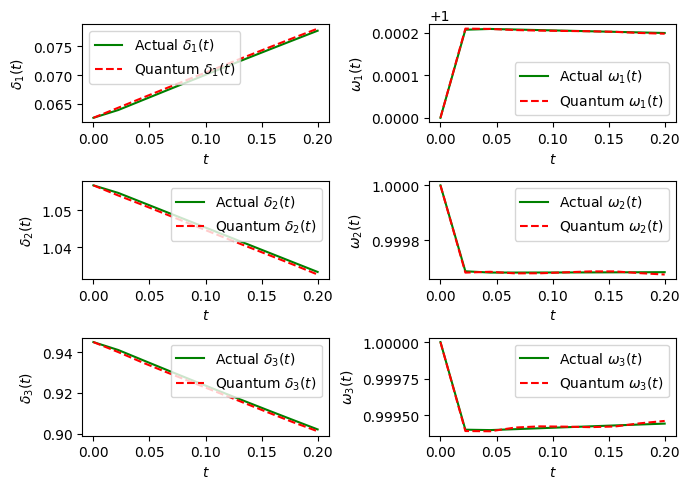

In [82]:
import matplotlib.pyplot as plt
import numpy as np



# Create a single figure with 3 rows and 2 columns of subplots
fig, axs = plt.subplots(3, 2, figsize=(7, 5))

# delta1_omega1
axs[0, 0].plot(t_data, del1_target_values, color='green', label='Actual $\delta_1(t)$', alpha=1)
axs[0, 0].plot(t_data, delta_pred1, 'r--', label='Quantum $\delta_1(t)$')
axs[0, 0].set_xlabel('$t$')
axs[0, 0].set_ylabel('$\delta_1(t)$')
axs[0, 0].legend()

delta_pred1_prime = np.gradient(delta_pred1, t_data)
axs[0, 1].plot(t_data, omega1_target_values, color='green', label='Actual $\omega_1(t)$', alpha=1)
axs[0, 1].plot(t_data, omega_pred1, 'r--', label='Quantum $\omega_1(t)$')
axs[0, 1].set_xlabel('$t$')
axs[0, 1].set_ylabel('$\omega_1(t)$')
axs[0, 1].legend()

# delta2_omega2
axs[1, 0].plot(t_data, del2_target_values, color='green', label='Actual $\delta_2(t)$', alpha=1)
axs[1, 0].plot(t_data, delta_pred2, 'r--', label='Quantum $\delta_2(t)$')
axs[1, 0].set_xlabel('$t$')
axs[1, 0].set_ylabel('$\delta_2(t)$')
axs[1, 0].legend()

delta_pred2_prime = np.gradient(delta_pred2, t_data)
axs[1, 1].plot(t_data, omega2_target_values, color='green', label='Actual $\omega_2(t)$', alpha=1)
axs[1, 1].plot(t_data, omega_pred2, 'r--', label='Quantum $\omega_2(t)$')
axs[1, 1].set_xlabel('$t$')
axs[1, 1].set_ylabel('$\omega_2(t)$')
axs[1, 1].legend()

# delta3_omega3
axs[2, 0].plot(t_data, del3_target_values, color='green', label='Actual $\delta_3(t)$', alpha=1)
axs[2, 0].plot(t_data, delta_pred3, 'r--', label='Quantum $\delta_3(t)$')
axs[2, 0].set_xlabel('$t$')
axs[2, 0].set_ylabel('$\delta_3(t)$')
axs[2, 0].legend()

delta_pred3_prime = np.gradient(delta_pred3, t_data)
axs[2, 1].plot(t_data, omega3_target_values, color='green', label='Actual $\omega_3(t)$', alpha=1)
axs[2, 1].plot(t_data, omega_pred3, 'r--', label='Quantum $\omega_3(t)$')
axs[2, 1].set_xlabel('$t$')
axs[2, 1].set_ylabel('$\omega_3(t)$')
axs[2, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()
